# Проверка гипотез в бизнесе

## Введение

### Заказчик
<font color='#777778'> Сервис проката самокатов GoFast. </font>

### Цель проекта

<font color='#777778'> Анализ пользовательского поведения, выявление ключевых факторов для увеличения доходности, а также оценку эффективности возможного перехода на платные модели подписки. </font>

### Задачи проекта 

<font color='#777778'>    
    
- Обработка и предобработка данных 
    
- Изучение данных о пользователях
    
- Анализ частоты и продолжительности поездок

- Оценка влияния платных подписок на общий доход</font>

# Описание данных

Таблица с пользователями `users_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `name` — имя пользователя.

- `age` — возраст.

- `city` — город.

- `subscription_type` — тип подписки: `free`, `ultra`.

Таблица с поездками `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `distance` — расстояние в метрах, которое пользователь проехал в текущей сессии.

- `duration` — продолжительность сессии в минутах, то есть время с того момента, как пользователь нажал кнопку «Начать поездку», до того, как он нажал кнопку «Завершить поездку».

- `date` — дата совершения поездки.

Таблица с подписками `subscriptions_go.csv`

- `subscription_type` — тип подписки.

- `minute_price` — стоимость одной минуты поездки по этой подписке.

- `start_ride_price` — стоимость начала поездки.

- `subscription_fee` — стоимость ежемесячного платежа.

### Содержимое проекта

<font color='#777778'>

1. [Загрузка и знакомство с данными.](#1-bullet)
2. [Предобработка данных](#2-bullet)
3. [Исследовательский анализ данных.](#3-bullet)
4. [Объединение данных.](#4-bullet).
5. [Подсчёт выручки.](#5-bullet)
6. [Проверка гипотез](#6-bullet)
7. [Распределения.](#7-bullet)
</font>

---

<a class="anchor" id="1-bullet"></a>
## Шаг 1. Загрузка данных

In [1]:
# Импортируем библиотеку

import pandas as pd

In [2]:
# Прочитаем датафреймы

df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
# Поочередно выведем первые 5 строк каждого датафрейма

df_users_go.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df_rides_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
df_subscriptions_go.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
# Определим количество строк в каждом датафрейме

print(f"{df_users_go.shape[0]} {df_rides_go.shape[0]} {df_subscriptions_go.shape[0]}")

1565 18068 2


<a class="anchor" id="2-bullet"></a>
## Шаг 2. Знакомство с данными и их предварительная подготовка

In [7]:
# В датафрейме df_rides_go выведем типы данных каждой колонки, используя атрибут dtypes

df_rides_go.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

In [8]:
# Приведем столбец date к корректному типу даты pandas, используя метод pd.to_datetime()

df_rides_go['date'] = pd.to_datetime(df_rides_go['date'], errors='coerce')

In [9]:
# Создадим новый столбец month, содержащий номер месяца.

df_rides_go['month'] = df_rides_go['date'].dt.month

In [10]:
# Определим количество пропусков и дубликатов

missing_values = df_users_go.isnull().sum().sum() 
duplicates = df_users_go.duplicated().sum() 
print(f"{missing_values} {duplicates}")

0 31


In [11]:
# Пропущенных значений нет, удалим дубликаты

df_users_go.fillna(0, inplace=True) 
df_users_go.drop_duplicates(inplace=True)

In [12]:
# Округлим длительность поездки до целого числа

df_rides_go['duration'] = df_rides_go['duration'].round().astype(int)

<a class="anchor" id="3-bullet"></a>
## Шаг 3. Исследовательский анализ данных (EDA)

In [13]:
# Импортируем библиотеку для визуализаций

import matplotlib.pyplot as plt

In [14]:
# Изучим количество пользователей в каждом городе

users_by_city_count = df_users_go['city'].value_counts()
print(users_by_city_count)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


In [15]:
# Создадим и выведем серию subscription_type_count с количеством пользователей 
# для каждого типа подписки subscription_type

subscription_type_count = df_users_go['subscription_type'].value_counts()
print(subscription_type_count)

subscription_type
free     835
ultra    699
Name: count, dtype: int64


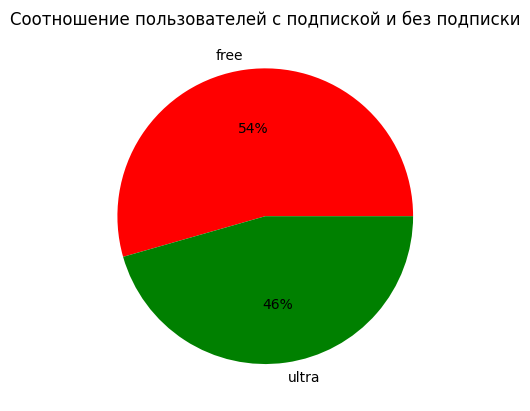

In [16]:
# Визуализация для процента пользователей с free и ultra подпиской

subscription_type_count.plot(
    kind='pie',
    title='Соотношение пользователей с подпиской и без подписки',
    autopct='%.0f%%',
    ylabel='',
    colors=['red', 'green']
)

plt.show()

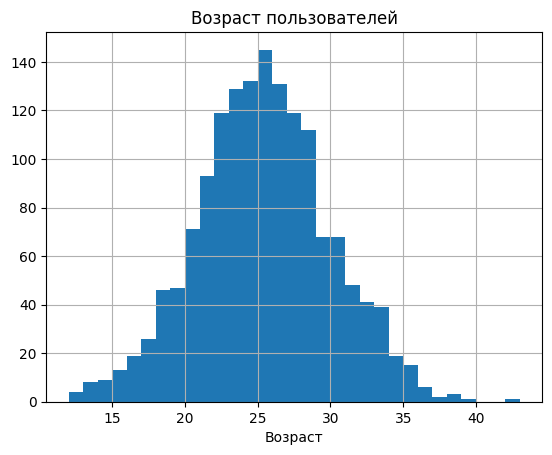

In [17]:
# Визуализация возрастов пользователей

n_bins = df_users_go['age'].max() - df_users_go['age'].min()
df_users_go['age'].hist(bins=n_bins)

plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.show()

In [18]:
# Доля несовершеннолетних пользователей

users_under_18_ratio = int((df_users_go[df_users_go['age'] < 18].shape[0] / df_users_go.shape[0]) * 100)
print(f'Доля несовершеннолетних пользователей самокатов составляет {users_under_18_ratio}%.')

Доля несовершеннолетних пользователей самокатов составляет 5%.


In [19]:
# Характеристики длительности поездки

duration_mean = int(df_rides_go['duration'].quantile(0.5))
duration_std = int(df_rides_go['duration'].std())

duration_pct25 = int(df_rides_go['duration'].quantile(0.25))
duration_pct75 = int(df_rides_go['duration'].quantile(0.75))

print(f'Средняя длительность поездки {duration_mean} минут со стандартным отклонением {duration_std}. Основная часть поездок занимает от {duration_pct25} до {duration_pct75} минут.')

Средняя длительность поездки 18 минут со стандартным отклонением 6. Основная часть поездок занимает от 14 до 22 минут.


<a class="anchor" id="4-bullet"></a>
## Шаг 4. Объединение данных

In [20]:
# Объединение таблицы пользователей и поездок

df = df_rides_go.merge(df_users_go, on='user_id', how='left')

In [21]:
# Присоединение информации о подписках 

df = df.merge(df_subscriptions_go, on='subscription_type', how='left')

In [22]:
# Размеры объединённого датафрейма

# Выводим первые строки датафрейма
display(df.head())

# Выводим количество строк и столбцов в объединённом датафрейме
n_rows, n_cols = df.shape
print(f'В полученном датафрейме {n_rows} строк и {n_cols} столбцов.')

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


В полученном датафрейме 18068 строк и 12 столбцов.


In [23]:
# Отдельные датафреймы для пользователей с подпиской и без

df_ultra = df[df['subscription_type'] == 'ultra']
df_free = df[df['subscription_type'] == 'free']

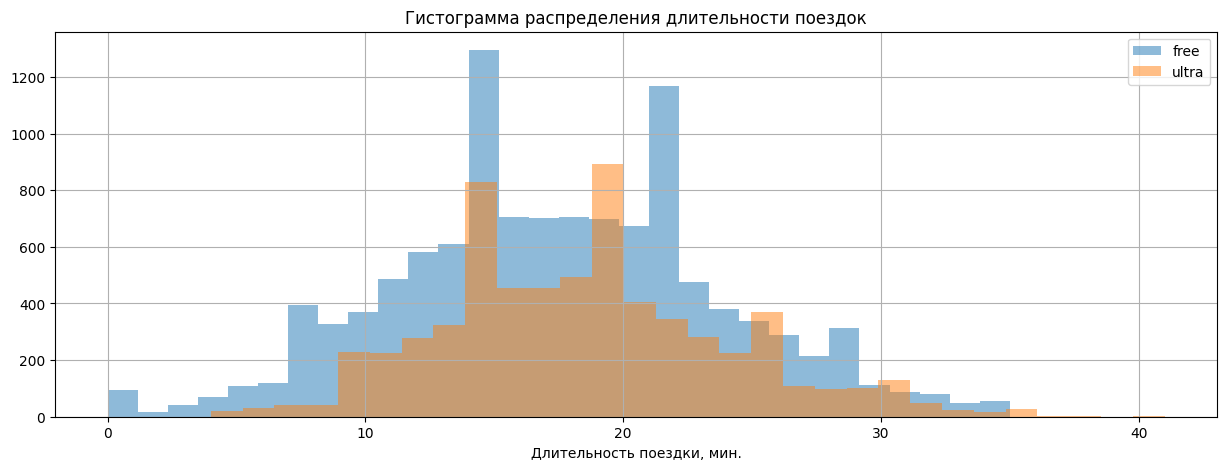

Средняя длительность поездки для пользователей без подписки 17 мин, а для пользователей с подпиской 19 мин


In [24]:
# Гистограмма длительности поездок для обоих групп

plt.figure(figsize=(15, 5))

df_free['duration'].hist(bins=30, label='free', alpha=0.5)
df_ultra['duration'].hist(bins=30, label='ultra', alpha=0.5)

plt.xlabel('Длительность поездки, мин.')
plt.title('Гистограмма распределения длительности поездок')
plt.legend()

plt.show()

mean_duration_free = int(df_free['duration'].mean().round(0))
mean_duration_ultra = int(df_ultra['duration'].mean().round(0))

print(f"Средняя длительность поездки для пользователей без подписки {mean_duration_free} мин, а для пользователей с подпиской {mean_duration_ultra} мин")

<a class="anchor" id="5-bullet"></a>
## Шаг 5. Подсчёт выручки

In [25]:
# Сгруппируем данные по следующим столбцам: user_id, name, subscription_type, month

df_gp = df.groupby(['user_id', 'name', 'subscription_type', 'month'], as_index=False)

In [26]:
# Подсчёт агрегированных метрик

df_agg = df_gp.agg( # Укажите подходящий инструмент здесь
    total_distance=('distance', 'sum'),
    total_duration= ('duration', 'sum'),
    rides_count= ('duration', 'count'),
    subscription_type= ('subscription_type', 'first') ,
    minute_price= ('minute_price', 'first') ,
    start_ride_price= ('start_ride_price', 'first') ,
    subscription_fee= ('subscription_fee', 'first') 
)

In [27]:
# Функция для подсчёта выручки

def calculate_monthly_revenue(row):
    return row['start_ride_price'] * row['rides_count'] + row['minute_price'] * row['total_duration'] + row['subscription_fee']

In [28]:
# Создание столбца с месячной выручкой на пользователя

df_agg['monthly_revenue'] = df_agg.apply(calculate_monthly_revenue, axis=1)

In [29]:
df_agg

,user_id,name,month,total_distance,total_duration,rides_count,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,Кира,1,7027.511294,42,2,ultra,6,0,199,451
1,1,Кира,4,754.159807,6,1,ultra,6,0,199,235
2,1,Кира,8,6723.470560,45,2,ultra,6,0,199,469
3,1,Кира,10,5809.911100,32,2,ultra,6,0,199,391
4,1,Кира,11,7003.499363,53,3,ultra,6,0,199,517
...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,6,3409.468534,24,2,free,8,50,0,292
11327,1534,Альберт,8,7622.453034,47,2,free,8,50,0,476
11328,1534,Альберт,9,4928.173852,23,1,free,8,50,0,234
11329,1534,Альберт,11,13350.015305,76,4,free,8,50,0,808


In [30]:
# Поиск пользователя с максимальной выручкой

max_revenue_user_id = df_agg.groupby('user_id')['monthly_revenue'].sum().idxmax()

max_revenue_user_data = df_agg[df_agg['user_id'] == max_revenue_user_id]

print(max_revenue_user_data[['user_id', 'name', 'month', 'rides_count', 'monthly_revenue']])

      user_id       name  month  rides_count  monthly_revenue
8877     1236  Александр      1            2              228
8878     1236  Александр      2            3              614
8879     1236  Александр      3            5              762
8880     1236  Александр      4            1              202
8881     1236  Александр      5            3              574
8882     1236  Александр      6            1              282
8883     1236  Александр      7            1              290
8884     1236  Александр      8            2              452
8885     1236  Александр      9            1              122
8886     1236  Александр     10            3              430
8887     1236  Александр     11            3              494
8888     1236  Александр     12            2              476


<a class="anchor" id="6-bullet"></a>
## Шаг 6. Проверка гипотез

In [31]:
# Импорт библиотеки SciPy

import scipy.stats as st

In [32]:
# Вспомогательная функция для интерпретации результатов

def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f"Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.")
    else:
        print(f"Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.")

print_stattest_results(p_value=0.0001)
print_stattest_results(p_value=0.1)

Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


Важно понять, тратят ли пользователи с подпиской больше времени на поездки?
- Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое.
- Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

In [33]:
# Длительность для пользователей с подпиской и без

ultra_duration = df_ultra['duration']
free_duration = df_free['duration']

results = st.ttest_ind(ultra_duration, free_duration, alternative= 'greater') 
p_value = results.pvalue
print_stattest_results(p_value)
ultra_mean_duration = round(ultra_duration.mean(), 2)
free_mean_duration = round(free_duration.mean(), 2)

print(f'Средняя длительность поездки тарифа Ultra {ultra_mean_duration}')
print(f'Средняя длительность поездки тарифа Free {free_mean_duration}')

Полученное значение p_value=3.1600689435611813e-35 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя длительность поездки тарифа Ultra 18.55
Средняя длительность поездки тарифа Free 17.39


### Длительность поездки: больше или меньше критического значения

- Нулевая гипотеза (Н0): Средняя дистанция поездки у пользователей с подпиской равна 3130 м.

- Альтернативная гипотеза (Н1): Средняя дистанция поездки у пользователей с подпиской больше 3130 м.

In [34]:
null_hypothesis = 3130
ultra_distance = df_ultra['distance']

results = st.ttest_1samp(ultra_distance, null_hypothesis, alternative='greater')
p_value = results.pvalue
print_stattest_results(p_value)

Полученное значение p_value=0.9195368847849785 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Прибыль от пользователей с подпиской и без

- Нулевая гипотеза (Н0): Средняя месячная выручка у пользователей с подпиской и без подписки одинаковая.
- Альтернативная гипотеза (Н1): Средняя месячная выручка у пользователей с подпиской выше, чем у пользователей без подписки.

In [35]:
ultra_revenue = df_agg[df_agg['subscription_type'] == 'ultra']['monthly_revenue']
free_revenue = df_agg[df_agg['subscription_type'] == 'free']['monthly_revenue']

results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')
p_value = results.pvalue

print_stattest_results(p_value)

mean_revenue_ultra = round(ultra_revenue.mean())
mean_revenue_free = round(free_revenue.mean())

print(f'Средняя выручка подписчиков Ultra {mean_revenue_ultra} руб')
print(f'Средняя выручка подписчиков Free {mean_revenue_free} руб')

Полученное значение p_value=1.7274069878387966e-37 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя выручка подписчиков Ultra 359 руб
Средняя выручка подписчиков Free 322 руб


<a class="anchor" id="7-bullet"></a>
## Шаг 7. Распределения

В компании возникла идея предлагать дополнительную скидку подписчикам, совершающим длительные поездки продолжительностью более 30 минут. Необходимо оценить долю таких поездок.

In [36]:
# Расчёт выборочного среднего и стандартного отклонения

mu = df_ultra['duration'].mean()
sigma = df_ultra['duration'].std()
target_time = 30

print(f'Средняя длительность поездки {round(mu, 1)}, стандартное отклонение {round(sigma)}.')

Средняя длительность поездки 18.5, стандартное отклонение 6.


In [37]:
# Вычисление значения функции распределения в точке (CDF)

duration_norm_dist = st.norm(mu, sigma)

prob = round(1 - duration_norm_dist.cdf(target_time), 3)

print(f'Вероятность поездки более 30 минут {prob}')

Вероятность поездки более 30 минут 0.02


In [38]:
# Вероятность для интервала (CDF)

low = 20
high = 30

prob_interval = round(duration_norm_dist.cdf(high) - duration_norm_dist.cdf(low), 3)


print(f'Вероятность того, что пользователь совершит поездку длительностью от {low} до {high} минут: {prob_interval}')

Вероятность того, что пользователь совершит поездку длительностью от 20 до 30 минут: 0.377
